In [44]:
# notebooks/togo_eda.ipynb
from notebook_helpers import add_project_root_to_path
from src.solar_data_analysis import DataAnalysis

In [45]:
# create togo object
sierraleone = DataAnalysis(r"C:\Users\bekuman\Downloads\data\sierraleone-bumbuna.csv")

In [46]:
# Loads the dataset into a DataFrame.
sierraleone.load_data()

Dataset loaded successfully.


In [47]:
# overview dataset:  head, tail, shape and random samble
sierraleone.overview()


 =================== Dataset Overview:===================================
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
5  2021-10-30 00:06 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
6  2021-10-30 00:07 -0.7  0.0 -0.8   0.0   0.0  22.0  99.4  0.1     0.7   
7  2021-10-30 00:08 -0.7  0.0 -0.8   0.0   0.0  22.0  99.5  0.2     0.7   
8  2021-10-30 00:09 -0.7 -0.1 -0.8   0.0   0.0  22.0  99.5  0.7     1.1   
9  2021-10-30 00:10 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.6     1.1   

   WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0    0.0      0

In [48]:
# Overview of numeric colums
sierraleone.describe_numeric()


 The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.0

In [49]:
#overview of categorial columns
sierraleone.describe_categorical_columns()


 The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2022-10-29 23:21
freq                   1


In [50]:
#over view of the dataset shape
sierraleone.info()

an overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [51]:
# check  if the missing value is exist
sierraleone.find_missing_value()

check for missing values
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [52]:
#  drop the missed column
sierraleone.drop_column(column_name="Comments")

successfuly dropped Comments column


In [53]:
 # Identify columns with more than 5% null values
sierraleone.report_null_columns()

Columns with missing values > 5%:

Series([], dtype: float64)


In [54]:
# check missing value
sierraleone.check_specific_missing_values(["GHI", "DNI", "DHI"])

GHI    0
DNI    0
DHI    0
dtype: int64


In [57]:
# Outlier Detection
sierraleone.detect_outliers(["GHI", "DNI", "DHI", "ModA", "ModB", "Tamb", "WS", "WSgust"])

=== Outlier Detection ===
Number of outlier samples flagged: 14946


In [56]:
# Detect and replace outliers in numeric columns with their respective median values
sierraleone.impute_outliers()


 Outliers have been replaced with median values.


In [58]:
# export cleaned data
export_dir = r"C:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\data"
sierraleone.export_cleaned_data(export_dir, file_name="sierraaleone_clean.csv")

Data exported to C:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\data\sierraaleone_clean.csv successfully!


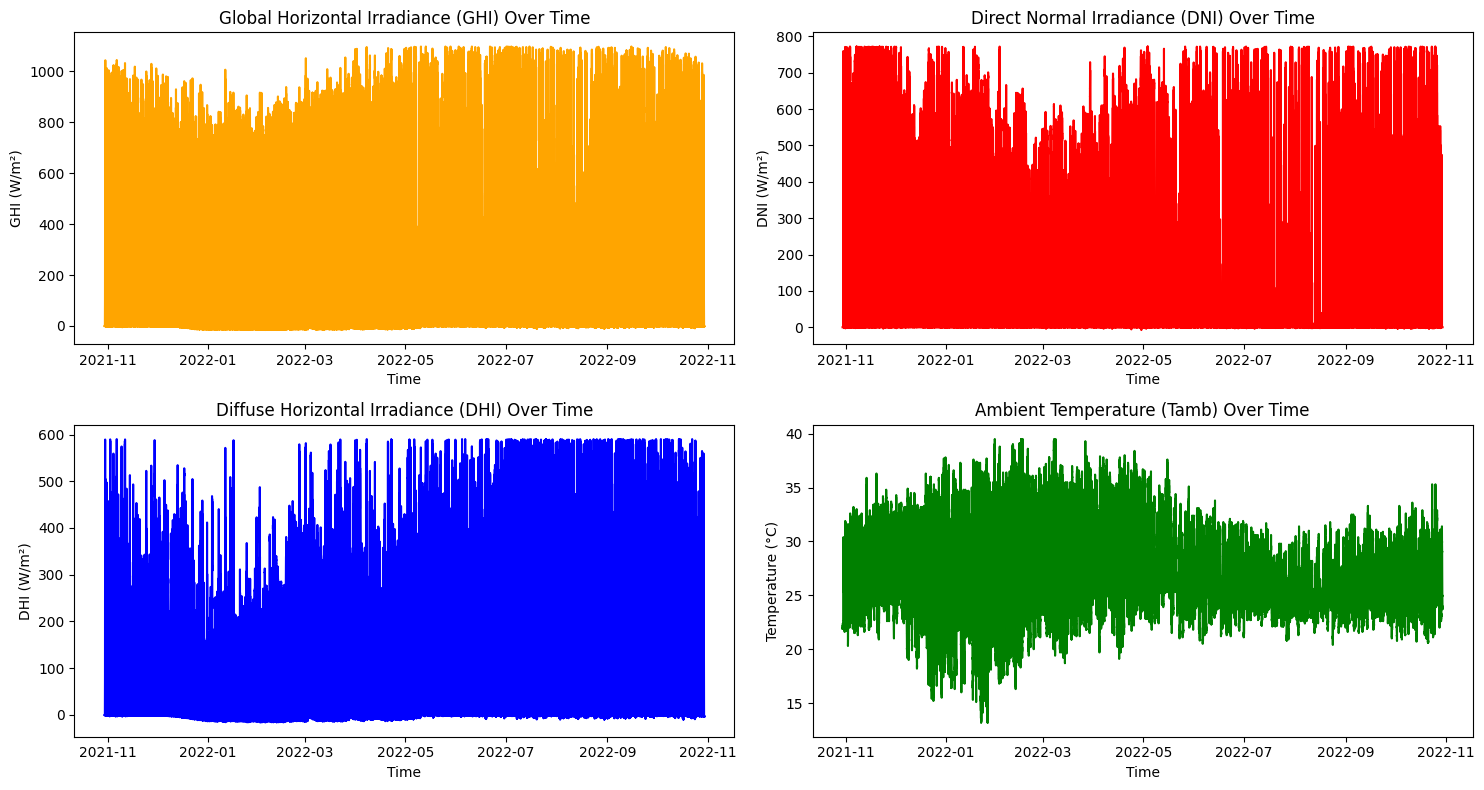

In [59]:
#Time Series Analysis
sierraleone.plot_time_series()

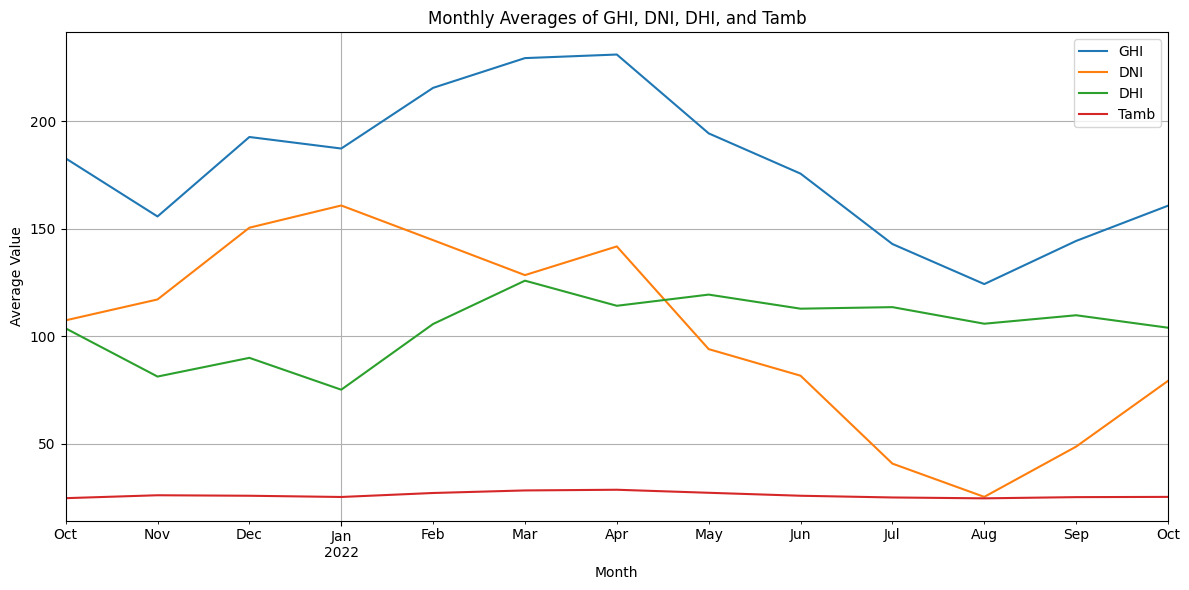

In [61]:
#montly trend analyisis
sierraleone.plot_monthly_averages()

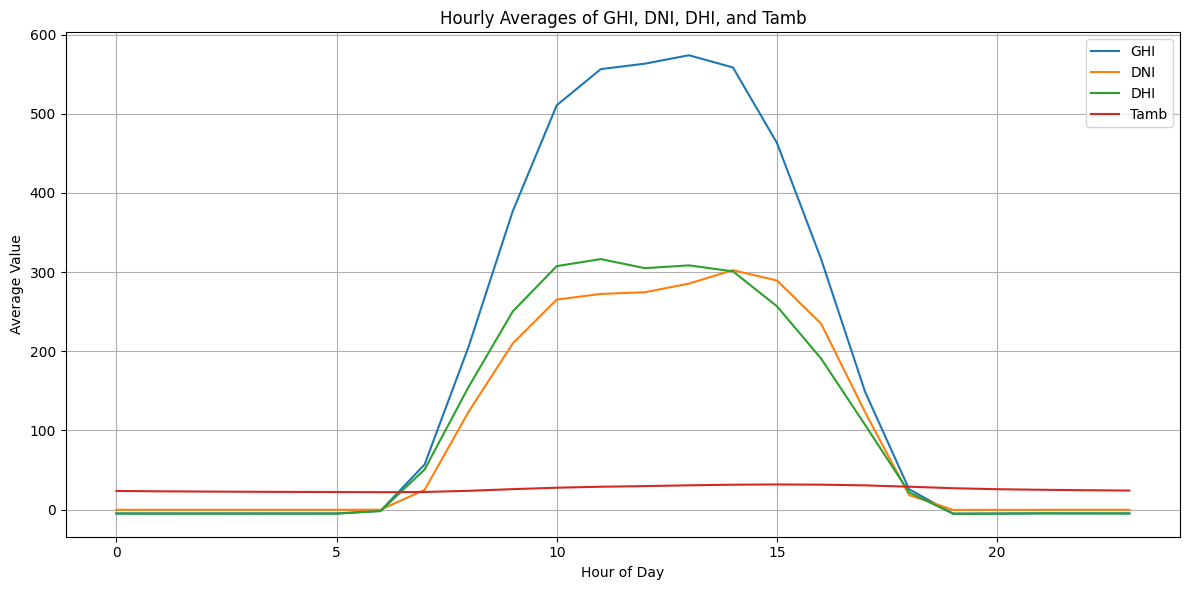

In [62]:
# hourly trend analysis for GHI, DNI and Tamb
sierraleone.plot_hourly_averages()

=== Cleaning Impact on ModA and ModB ===
   Cleaning        ModA        ModB
0         0  183.896726  176.059885
1         1  273.309252  277.231102


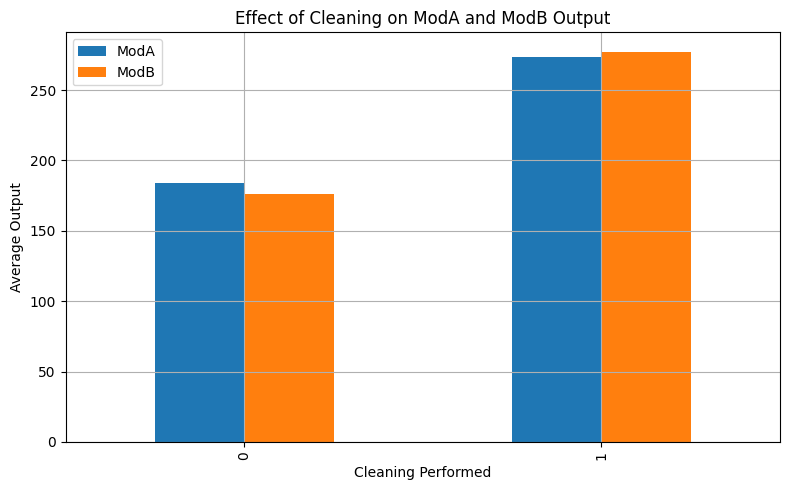

In [63]:
#Analyze how panel cleaning affect ModA and ModB performance
sierraleone.analyze_cleaning_impact()

=== Wind Speed vs GHI Scatter Plots ===


c:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


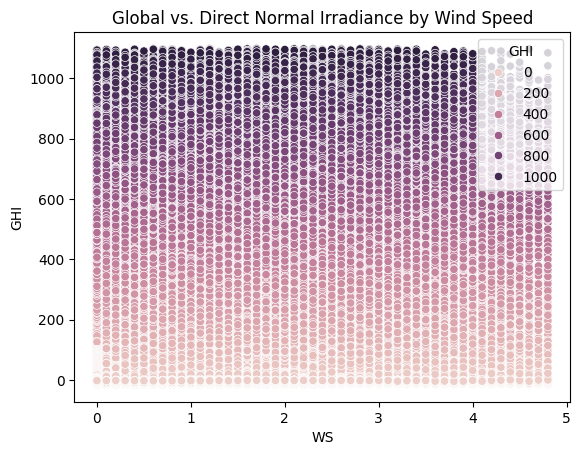

c:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


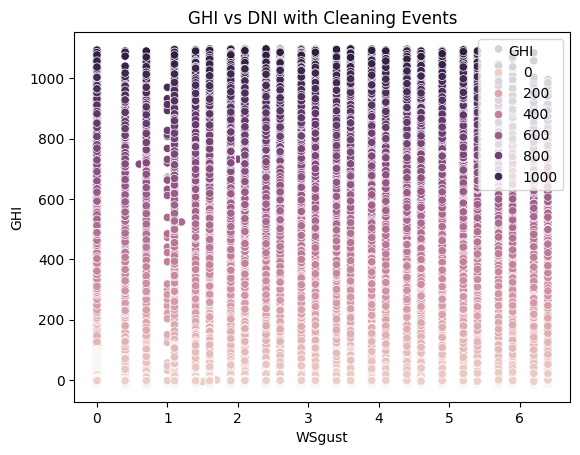

In [64]:
sierraleone.scatter_plot()

=== Correlation Matrix Heatmap ===


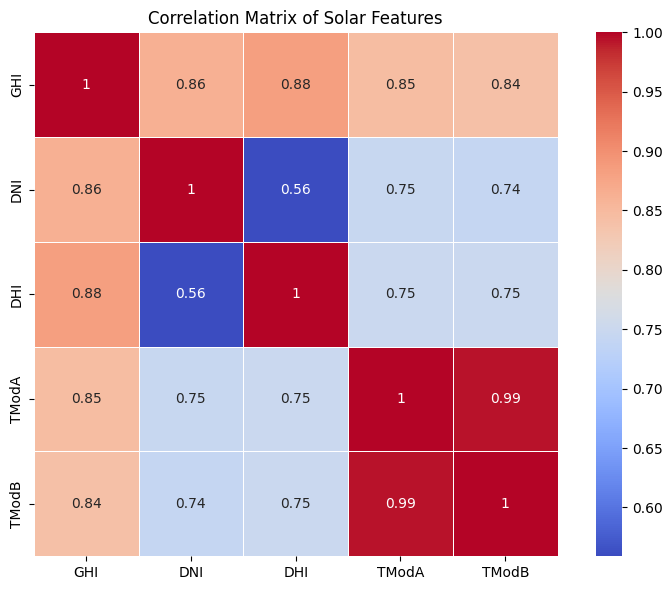

In [65]:
# Compute the correlation matrix for numeric columns and Visualize the heatmap
sierraleone.plot_correlation_heatmap()

=== Wind & Distribution Analysis ===


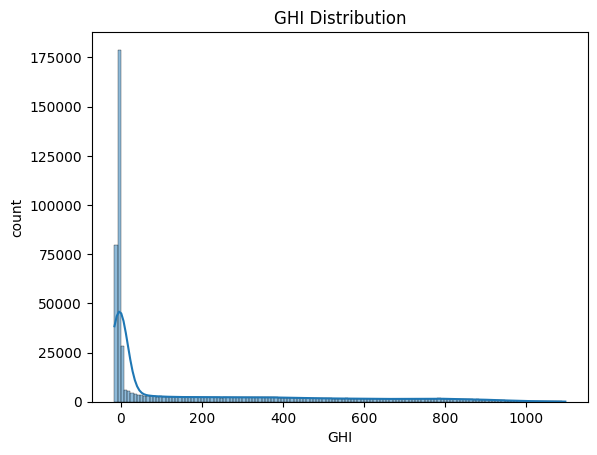

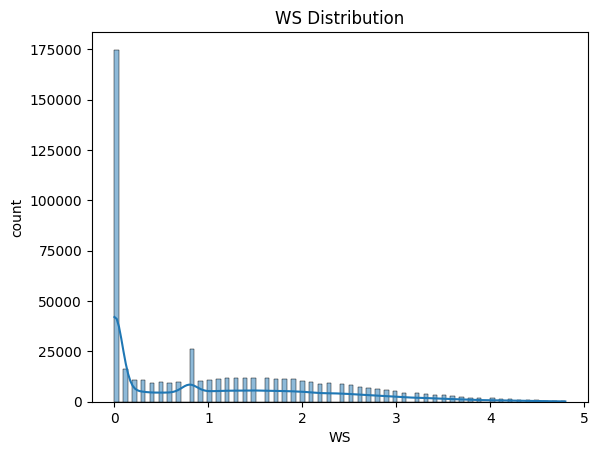

In [66]:
# Histograms for GHI and  one other variable (e.g. WS).
sierraleone.wind_and_distribution_analysis(["GHI", "WS"])

c:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


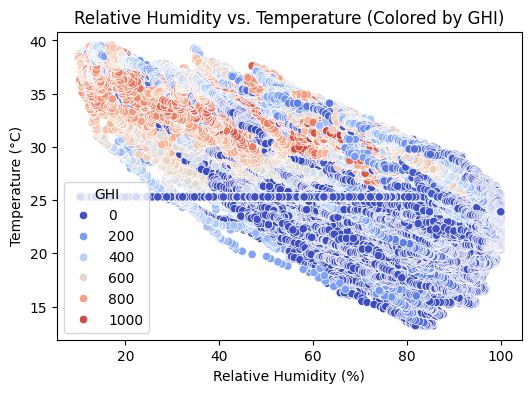

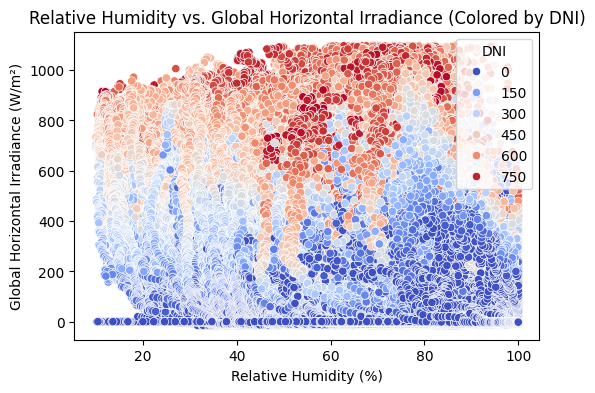

In [67]:
sierraleone.tempature_analysis()

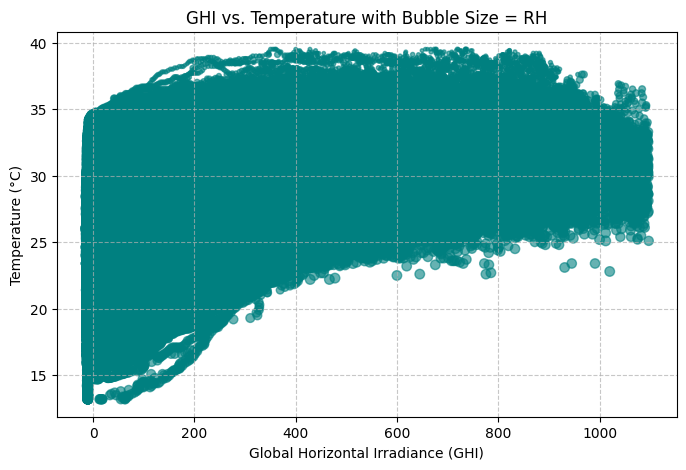

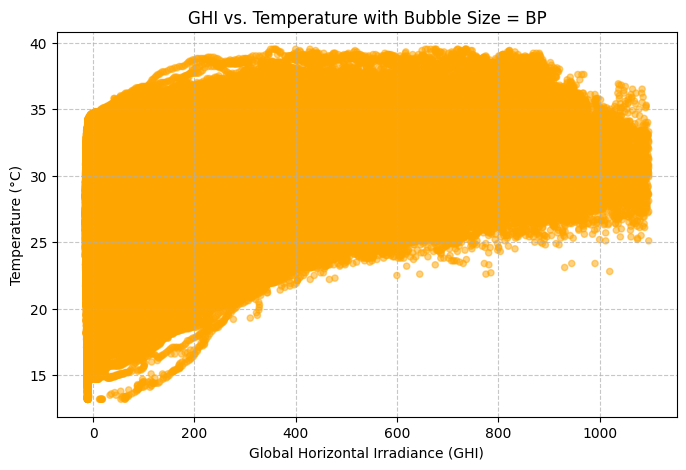

In [68]:
# Generate a bubble charts to visualize the relationship between GHI vs. Tamb with bubble size = RH or BP.
sierraleone.bubble_chart()